Directories size

In [85]:
import os, shutil

train_dir = './dataset/train/glob'
validation_dir = './dataset/val/glob'
test_dir = './dataset/test/glob'
train_glob_red = './dataset/train/glob/red'
train_glob_blue = './dataset/train/glob/blue'
val_glob_red = './dataset/val/glob/red'
val_glob_blue = './dataset/val/glob/blue'
test_glob_red = './dataset/test/glob/red'
test_glob_blue = './dataset/test/glob/blue'
print('total training red images:', len(os.listdir(train_glob_red)))
print('total training blue images:', len(os.listdir(train_glob_blue)))
print('total validation red images:', len(os.listdir(val_glob_red)))
print('total validation blue images:', len(os.listdir(val_glob_blue)))
print('total testing red images:', len(os.listdir(test_glob_red)))
print('total testing blue images:', len(os.listdir(test_glob_blue)))

total training red images: 128
total training blue images: 157
total validation red images: 27
total validation blue images: 33
total testing red images: 29
total testing blue images: 36


Data preprocessing

In [86]:
from keras.utils import image_dataset_from_directory

IMG_SIZE = 150

train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64)

validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32)

Found 285 files belonging to 2 classes.


Found 60 files belonging to 2 classes.
Found 65 files belonging to 2 classes.


Shape of each batch

In [87]:
for data_batch, labels_batch in train_dataset:
 print('data batch shape:', data_batch.shape)
 print('labels batch shape:', labels_batch.shape)
 break

data batch shape: (64, 150, 150, 3)
labels batch shape: (64,)


Viewing first 5 images of the first batch

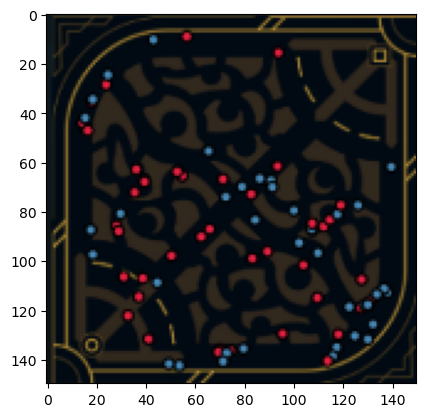

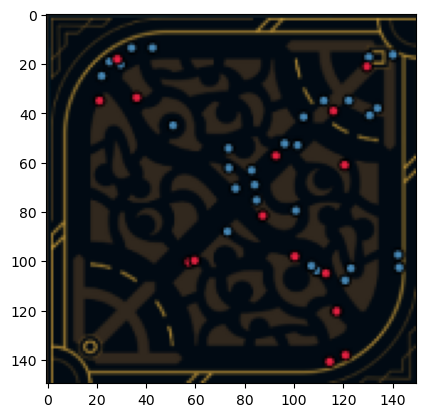

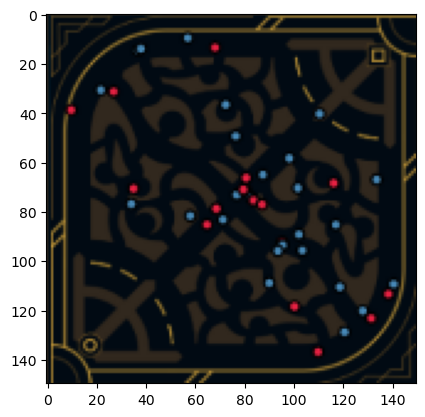

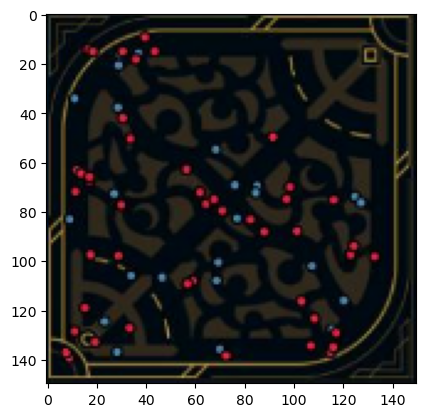

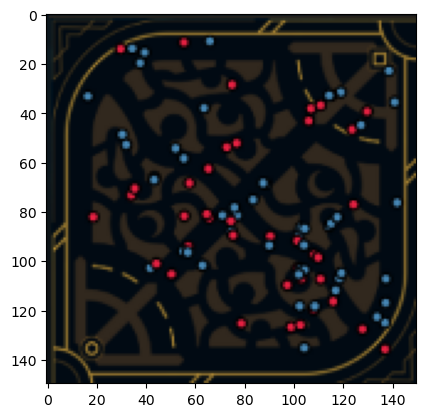

In [88]:
import matplotlib.pyplot as plt

for data_batch, _ in train_dataset.take(1):
 for i in range(5):
    plt.imshow(data_batch[i].numpy().astype("uint8"))
    plt.show()

Creating NN

In [89]:
from tensorflow import keras
from keras import layers
from keras import models

inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Compiling NN

In [90]:
import tensorflow as tf
model.compile(
 loss='binary_crossentropy',
 optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
 metrics=['acc'])

Training the model

In [91]:
history = model.fit(
 train_dataset,
 epochs=50,
 validation_data=validation_dataset)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 448ms/step - acc: 0.5097 - loss: 0.6910 - val_acc: 0.6000 - val_loss: 0.6799
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc: 0.6144 - loss: 0.6728 - val_acc: 0.7333 - val_loss: 0.6717
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.6271 - loss: 0.6659 - val_acc: 0.8167 - val_loss: 0.6490
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - acc: 0.7425 - loss: 0.6360 - val_acc: 0.5500 - val_loss: 0.6727
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - acc: 0.6905 - loss: 0.5875 - val_acc: 0.8167 - val_loss: 0.5642
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - acc: 0.7640 - loss: 0.5602 - val_acc: 0.7833 - val_loss: 0.5485
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - acc: 0.8058 - loss: 0.5105 - val_acc: 0.6667 - val_loss: 0.5762
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - acc: 0.6931 - loss: 0.5299 - val_acc: 0.6500 - val_loss: 0.5880
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - acc: 0.7137 - loss: 0.5312 -

Loss and Accuracy

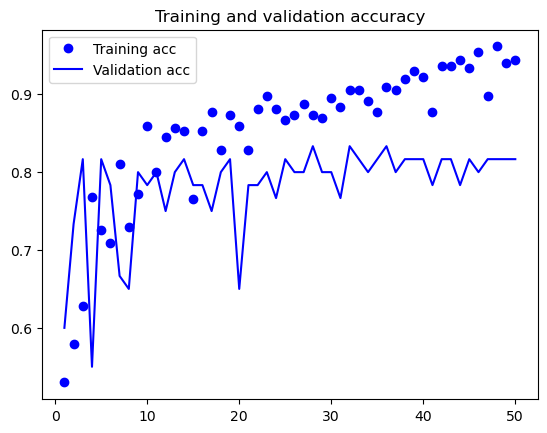

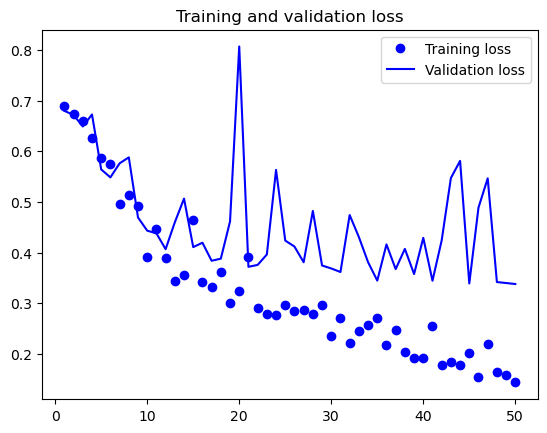

In [92]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
